In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,[3,4]].values

# Estimate bandwidth for Mean Shift
# n_samples should not exceed the number of actual data points
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=min(len(X), 500))

# Initialize and fit Mean Shift model
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=27.161411938994306, bin_seeding=True)

In [5]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [7]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Number of estimated clusters (Mean Shift): %d" % n_clusters_)

Number of estimated clusters (Mean Shift): 3


In [8]:
supervised = dataset.copy() # Make a copy to avoid modifying original dataset DataFrame directly
supervised['Cluster_group'] = labels # Assign Mean Shift labels

In [9]:
# Save the clustered data to a CSV file
supervised.to_csv("cluster_meanshift.csv", index=False)
print("Cluster labels assigned and saved to cluster_meanshift.csv")

# Print the cluster centers
print("\nMean Shift Cluster Centers:")
print(cluster_centers)

Cluster labels assigned and saved to cluster_meanshift.csv

Mean Shift Cluster Centers:
[[54.95402299 48.73563218]
 [81.88888889 81.5       ]
 [82.2        19.37142857]]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


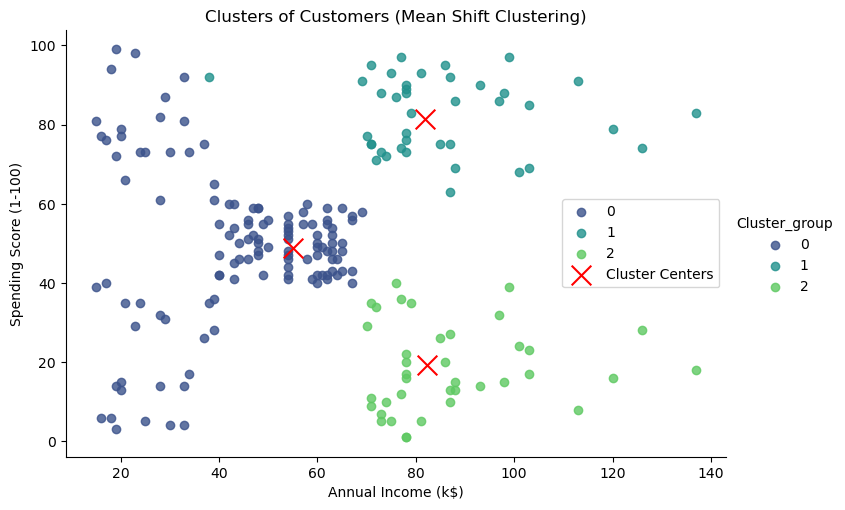

In [11]:
# Plotting the clusters
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False, legend=True, legend_out=True, palette='viridis', aspect=1.5)

# Plotting the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', marker='x', label='Cluster Centers')

plt.title('Clusters of Customers (Mean Shift Clustering)')
plt.xlabel(supervised.columns[3])
plt.ylabel(supervised.columns[4])
plt.legend()
plt.show()